## A notebook to create a bar graph of datasets per organ

This recreates [https://github.com/cns-iu/hra-cell-type-populations-supporting-information/blob/main/paper_plots/hra-pop-as-datasets-cells.Rmd](https://github.com/cns-iu/hra-cell-type-populations-supporting-information/blob/main/paper_plots/hra-pop-as-datasets-cells.Rmd) and potentially all other plots for the paper.

## Install and import libraries

In [36]:
%pip install pandas seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Set global variables

In [37]:
hra_pop_version = 'v0.11.1'

## Load data

In [38]:
# set url
raw_url = f'https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/main/output-data/{hra_pop_version}/reports/'

# load data
df_as_datasets_modality = pd.read_csv(f"{raw_url}atlas-ad-hoc/as-datasets-modality.csv")
df_dataset_cell_count_check = pd.read_csv(f"{raw_url}universe-ad-hoc/dataset-cell-count-check.csv")

df_as_datasets_modality

,sex,organId,organ_label,refOrgan,refOrganAs,dataset,tool,modality,as_label
0,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,sigmoid colon
1,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001159,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,sigmoid colon
2,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001158,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,descending colon
3,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001158,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,descending colon
4,Female,http://purl.obolibrary.org/obo/UBERON_0000059,large intestine,http://purl.org/ccf/latest/ccf.owl#VHFColon,http://purl.obolibrary.org/obo/UBERON_0001158,https://entity.api.hubmapconsortium.org/entiti...,celltypist,sc_transcriptomics,descending colon
...,...,...,...,...,...,...,...,...,...
3146,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0006082,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,fundus of urinary bladder
3147,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0006082,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,fundus of urinary bladder
3148,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0001257,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,trigone of urinary bladder
3149,Male,http://purl.obolibrary.org/obo/UBERON_0001255,urinary bladder,http://purl.org/ccf/latest/ccf.owl#VHMUrinaryB...,http://purl.obolibrary.org/obo/UBERON_0006082,https://entity.api.hubmapconsortium.org/entiti...,popv,sc_transcriptomics,fundus of urinary bladder


## Visualize

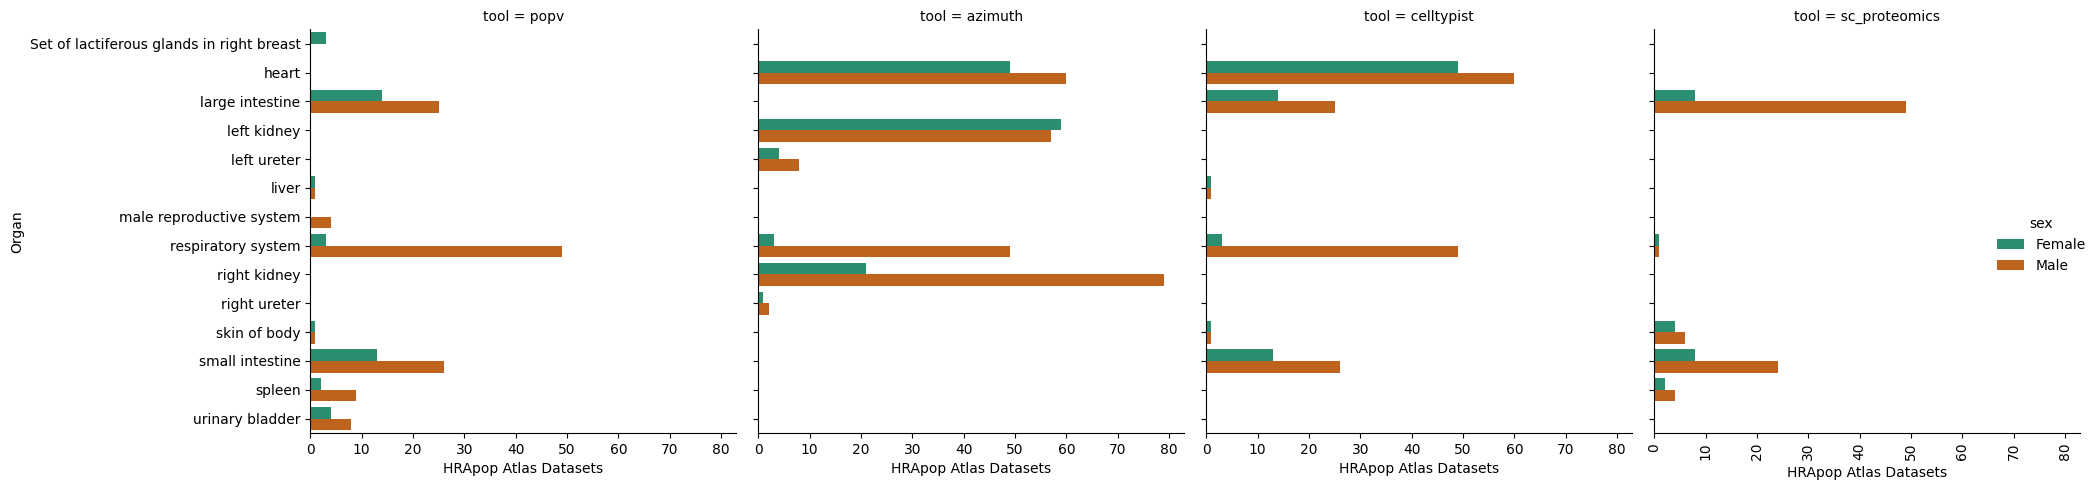

In [39]:
# create a new df that counts unique values in 'values' grouped by 'category' and 'group'
df_unique_counts = df_as_datasets_modality.groupby(['organ_label', 'tool', 'sex'])[
    'dataset'].nunique().reset_index()

sns.set_palette("Dark2")

# Faceted bar plot
g = sns.catplot(
    data=df_unique_counts,
    x='dataset',
    y='organ_label', 
    hue='sex',
    kind='bar', 
    col='tool'
)

g.set_axis_labels("HRApop Atlas Datasets", "Organ")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()